# Prepocessing dataset for the multilabel text classification

In [2]:
import os
import pandas as pd
import numpy as np
import json

In [3]:
meta_df = pd.read_json("/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json", lines=True)

In [4]:
# Make sure that the data loaded
meta_df.shape

(2231517, 14)

In [5]:
meta_df.head(3)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"


In [6]:
# For the multilabel classification we use title, categories and abstract
columns = ['title', 'abstract', 'categories']
meta_dfs = meta_df[columns]

In [7]:
# Make a list of categories in the new column
meta_dfs['category'] = meta_dfs.categories.str.split(' ')
# Define main category(ies) for each article by removing subcategories 
# defined after the dot
meta_dfs['main_category'] = meta_dfs.category.apply(lambda x:[a.split('.')[0] for a in x])
meta_dfs.drop(columns=['categories','category'], inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [8]:
meta_dfs.head(3)
len(meta_dfs)

2231517

In [9]:
# encode categories into labele columns
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(meta_dfs.main_category)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [10]:
# We successfully generated a category encoding for every article
len(labels)

2231517

In [11]:
# There are in total 38 categories
labels[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
df = pd.concat([meta_dfs[['abstract','title']], pd.DataFrame(labels)], axis=1)
df.columns = ['abstract','title'] + list(mlb.classes_)
df.head(4)

,abstract,title,acc-phys,adap-org,alg-geom,ao-sci,astro-ph,atom-ph,bayes-an,chao-dyn,...,patt-sol,physics,plasm-ph,q-alg,q-bio,q-fin,quant-ph,solv-int,stat,supr-con
0,A fully differential calculation in perturba...,Calculation of prompt diphoton production cros...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"We describe a new algorithm, the $(k,\ell)$-...",Sparsity-certifying Graph Decompositions,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The evolution of Earth-Moon system is descri...,The evolution of the Earth-Moon system based o...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,We show that a determinant of Stirling cycle...,A determinant of Stirling cycle numbers counts...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# For our task we remove the categories with small number of articles
columns = df.columns
# Find the frequencies of the articles in every category
categor_freq = df[columns[2:]].sum()/df.shape[0]
categor_freq

acc-phys    0.000022
adap-org    0.000262
alg-geom    0.000638
ao-sci      0.000008
astro-ph    0.143782
atom-ph     0.000055
bayes-an    0.000007
chao-dyn    0.001075
chem-ph     0.000112
cmp-lg      0.000401
comp-gas    0.000099
cond-mat    0.155370
cs          0.225164
dg-ga       0.000328
econ        0.003331
eess        0.028529
funct-an    0.000191
gr-qc       0.044439
hep-ex      0.022425
hep-lat     0.011905
hep-ph      0.076550
hep-th      0.070505
math        0.262658
math-ph     0.032991
mtrl-th     0.000117
nlin        0.017972
nucl-ex     0.010841
nucl-th     0.024175
patt-sol    0.000291
physics     0.102532
plasm-ph    0.000017
q-alg       0.000707
q-bio       0.018315
q-fin       0.007448
quant-ph    0.059791
solv-int    0.000633
stat        0.047508
supr-con    0.000078
dtype: float64

In [14]:
import matplotlib.pyplot as plt

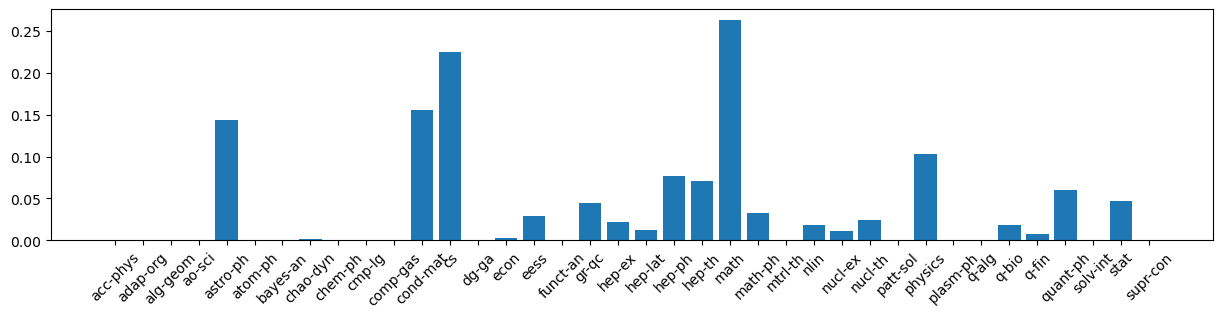

In [15]:
plt.rcParams["figure.figsize"] = (15,3)
plt.bar(categor_freq.index, categor_freq.values)
_ = plt.xticks(rotation = 45)

In [16]:
# Drop the categories with low frequencies
signif_cols = categor_freq.index[categor_freq.values>0.003]
df0 = df[['abstract', 'title']+list(signif_cols)]
# Remove articles with zeros in all the categories
df0 = df0.loc[df0[signif_cols].sum(axis=1)>0]
df0.head(4)

,abstract,title,astro-ph,cond-mat,cs,econ,eess,gr-qc,hep-ex,hep-lat,...,math,math-ph,nlin,nucl-ex,nucl-th,physics,q-bio,q-fin,quant-ph,stat
0,A fully differential calculation in perturba...,Calculation of prompt diphoton production cros...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"We describe a new algorithm, the $(k,\ell)$-...",Sparsity-certifying Graph Decompositions,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,The evolution of Earth-Moon system is descri...,The evolution of the Earth-Moon system based o...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,We show that a determinant of Stirling cycle...,A determinant of Stirling cycle numbers counts...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [18]:
df0.columns

Index(['abstract', 'title', 'astro-ph', 'cond-mat', 'cs', 'econ', 'eess',
       'gr-qc', 'hep-ex', 'hep-lat', 'hep-ph', 'hep-th', 'math', 'math-ph',
       'nlin', 'nucl-ex', 'nucl-th', 'physics', 'q-bio', 'q-fin', 'quant-ph',
       'stat'],
      dtype='object')

In [19]:
df0.shape

(2231517, 22)

In [20]:
# Save the preprocessed data
df0.to_csv("arxiv-preprocessed_v3.tsv", sep="\t", header=True, index=False)

In [ ]:
!zip -r -j /kaggle/working/data.zip /kaggle/working/arxiv-preprocessed.tsv

# Data exploration step: plot abstracts using PCA

Let's make sure that the data makes sense

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# To reduce the data size we randomly subsample abstracts with a single category
sample_pca = df0.loc[df0.iloc[:,2:].apply(sum, axis=1) == 1,:].sample(n = 10_000, random_state = 4)

NameError: name 'df0' is not defined

In [ ]:
sample_pca.head()

In [ ]:
X = TfidfVectorizer(stop_words=stop_words).fit_transform(sample_pca.abstract).todense()

In [ ]:
pca = PCA(n_components=2).fit(X)
data2D = pd.DataFrame(pca.transform(X), columns = ['PC1','PC2'])

In [ ]:
data2D

In [ ]:
# Get the corresponding categories for abstracts
color = sample_pca.iloc[:,2:].apply(lambda x: x.index[x>0][0], axis = 1)
data2D['category'] = color.to_list()

In [ ]:
data2D

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,10)
sns.set_style("ticks")
_=sns.scatterplot(data=data2D, x='PC1', y='PC2', hue='category')\
                    .set_title("PCA of the vectorized abstracts", fontdict= { 'fontsize': 18, 'fontweight':'bold'})